In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc

In [3]:
# file = "vinffixed/TKE_terms_height_147.4894258415078_interior_velocity_0.1_visc_1.0e-5_Sinf_1.5001427892662003_gamma_0.14292444558091658_theta_2.716_f_0.0001_N2_1.0e-5.nc"
file = "mastersthesis/TKE_terms_height_63.21485960107034_interior_velocity_0.1_visc_1.0e-5_Sinf_1.0000287024749517_gamma_0.5002284142579378_theta_1.8113_f_0.0001_N2_1.0e-5.nc"

ocean_data=xr.open_dataset("/glade/derecho/scratch/knudsenl/data/new_data/"+file)

In [4]:
theta = 1.8113*np.pi/180
N2 = 10**(-5)
Vinf = 0.1
f = 10**(-4)
gm = 0.47106996773982085
h = f*Vinf/(N2*np.tan(theta)*gm)
fstar = np.cos(theta)*(f**2+np.tan(theta)**2*N2)**(0.5)
lmbd = (N2*np.tan(theta)*gm)/f
delta = 0.5

In [5]:
KE_spatial_average_time_series = ocean_data.k 

In [6]:
inertial_period = (KE_spatial_average_time_series.time/pd.Timedelta("1s"))*(fstar/(2*np.pi))
KE_spatial_average_time_series_ip = KE_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))

In [7]:
seconds = KE_spatial_average_time_series.time/pd.Timedelta("1s")

In [8]:
AGSP_spatial_average_time_series = ocean_data.AGSP 
inertial_period = AGSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
AGSP_spatial_average_time_series_ip = AGSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
WSP_spatial_average_time_series = ocean_data.WSP 
inertial_period = WSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
WSP_spatial_average_time_series_ip = WSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
GSP_spatial_average_time_series = ocean_data.GSP 
inertial_period = GSP_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
GSP_spatial_average_time_series_ip = GSP_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
BFLUX_spatial_average_time_series = ocean_data.BFLUX 
inertial_period = BFLUX_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
BFLUX_spatial_average_time_series_ip = BFLUX_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
E_spatial_average_time_series = -1*ocean_data.E 
inertial_period = E_spatial_average_time_series.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
E_spatial_average_time_series_ip = E_spatial_average_time_series.assign_coords(intp = ('time',inertial_period.data))
KE_turb = ocean_data.k 
seconds = KE_turb.time/pd.Timedelta("1s")
inertial_period = KE_turb.time/pd.Timedelta("1s")*(fstar)/(2*np.pi)
KE_turb_ip = KE_turb.assign_coords(intp = ('time',inertial_period.data))
KE_turb_ip = KE_turb_ip.assign_coords(sec = ('time',seconds.data))
dkdt = KE_turb_ip.differentiate(coord='sec',edge_order=2)

In [9]:
file = "vinffixed/flow_fields_height_63.21485960107034_interior_velocity_0.1_visc_1.0e-5_Sinf_1.0000287024749517_gamma_0.5002284142579378_theta_1.8113_f_0.0001_N2_1.0e-5.nc"
flow_fields = xr.open_dataset("/glade/derecho/scratch/knudsenl/data/new_data/"+file)#.isel(time=slice(0,4000)) #i=103
seconds = flow_fields.time/pd.Timedelta("1s")
flow_fields = flow_fields.assign_coords(time = ('time',seconds.data))

In [10]:
def z_change(t,z,x):
    z_osc = f*np.cos(theta)*delta*lmbd/(fstar**2)*(np.cos(fstar*t)-1)*(h-z)
    return z_osc

In [11]:
flow_fields.u.zC[40]

<xarray.DataArray 'zC' ()> Size: 8B
array(31.640625)
Coordinates:
    zC       float64 8B 31.64
Attributes:
    units:      m
    long_name:  Locations of the cell centers in the z-direction.

In [12]:
ti = 600
tf = 681
zi = 20
xi = 256
u_lagrange = flow_fields.u.sel(xF=flow_fields.xF[xi]-z_change(flow_fields.time[ti:tf],flow_fields.zC[zi],flow_fields.xF[xi]),zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
v_lagrange = flow_fields.v.sel(xC=flow_fields.xF[xi]-z_change(flow_fields.time[ti:tf],flow_fields.zC[zi],flow_fields.xF[xi]),zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
w_lagrange = flow_fields.w.sel(xC=flow_fields.xF[xi]-z_change(flow_fields.time[ti:tf],flow_fields.zC[zi],flow_fields.xF[xi]),zF=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
b_lagrange = flow_fields.b.sel(xC=flow_fields.xF[xi]-z_change(flow_fields.time[ti:tf],flow_fields.zC[zi],flow_fields.xF[xi]),zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
u_lagrange = u_lagrange.drop_vars(['xF','yC','zC'])
v_lagrange = v_lagrange.drop_vars(['xC','yF','zC'])
w_lagrange = w_lagrange.drop_vars(['xC','yC','zC'])
b_lagrange = b_lagrange.drop_vars(['xC','yC','zC'])
Ub = flow_fields.ub.sel(xF=flow_fields.xF[xi],zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
Vb = flow_fields.vb.sel(xC=flow_fields.xC[xi],zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
Bb = flow_fields.B.sel(xC=flow_fields.xC[xi],zC=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")


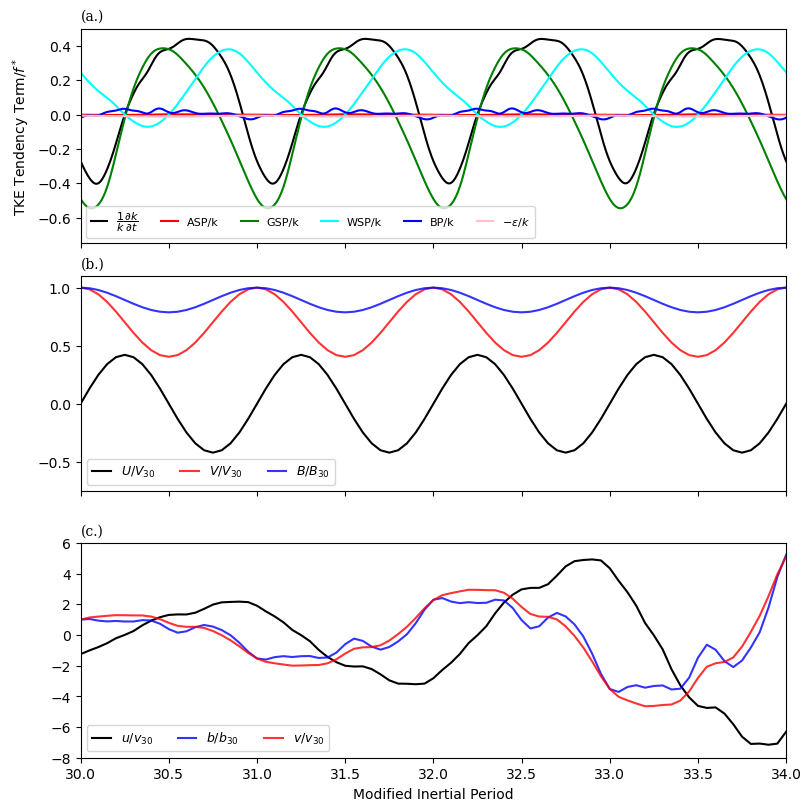

In [13]:
fig, ax_dict = plt.subplot_mosaic([['(a.)'],['(b.)'],['(c.)']],sharex=True,layout="constrained",figsize=(8,8)) # 
ax = ax_dict['(a.)']
ts2 = 6000 #3400 # -650 # 1980 
tf2 = 6801 # -340 # 2370
sum = dkdt[ts2:tf2]-AGSP_spatial_average_time_series_ip.values[ts2:tf2]-WSP_spatial_average_time_series_ip.values[ts2:tf2]-GSP_spatial_average_time_series_ip.values[ts2:tf2]-BFLUX_spatial_average_time_series_ip.values[ts2:tf2] -E_spatial_average_time_series_ip.values[ts2:tf2] #+KTRANS_spatial_average_time_series_ip.values[ts2:tf2]+PWORK_spatial_average_time_series_ip.values[ts2:tf2]
ax.plot(dkdt.intp[ts2:tf2],dkdt[ts2:tf2]/(KE_turb_ip[ts2:tf2]*fstar),color="k",label='$\dfrac{1}{k}\dfrac{\partial k}{\partial t}$')
ax.plot(AGSP_spatial_average_time_series_ip.intp[ts2:tf2],AGSP_spatial_average_time_series_ip.values[ts2:tf2]/(KE_turb_ip.values[ts2:tf2]*fstar),color='red',label='ASP/k')
ax.plot(GSP_spatial_average_time_series_ip.intp[ts2:tf2],GSP_spatial_average_time_series_ip.values[ts2:tf2]/(KE_turb_ip.values[ts2:tf2]*fstar),color='green',label='GSP/k')
ax.plot(WSP_spatial_average_time_series_ip.intp[ts2:tf2],WSP_spatial_average_time_series_ip.values[ts2:tf2]/(KE_turb_ip.values[ts2:tf2]*fstar),color='cyan',label='WSP/k')
ax.plot(BFLUX_spatial_average_time_series_ip.intp[ts2:tf2],BFLUX_spatial_average_time_series_ip.values[ts2:tf2]/(KE_turb_ip.values[ts2:tf2]*fstar),color='blue',label='BP/k')
ax.plot(E_spatial_average_time_series_ip.intp[ts2:tf2],E_spatial_average_time_series_ip.values[ts2:tf2]/(KE_turb_ip.values[ts2:tf2]*fstar),color='pink',label='$-\epsilon/k$')
# ax.plot(dkdt.intp[ts2:tf2],sum.values/(KE_turb_ip[ts2:tf2]*fstar),color="k",linestyle="--", label="Residual/k")
ax.legend(loc="lower left",ncols=7,prop={'size':8},handlelength=1.5)
ax.set_ylabel("TKE Tendency Term/$f^*$")
ax.set_ylim([-0.75,0.5])
ax.set_title("(a.)", fontfamily='serif', loc='left', fontsize='medium')
ax = ax_dict["(c.)"]
ax.plot(u_lagrange.time*fstar/(2*np.pi),u_lagrange.values/v_lagrange.values[0],color="k",label="$u/v_{30}$")
ax.plot(b_lagrange.time*fstar/(2*np.pi),b_lagrange.values/b_lagrange.values[0],color="b",alpha=0.8,label="$b/b_{30}$")
ax.plot(v_lagrange.time*fstar/(2*np.pi),v_lagrange.values/v_lagrange.values[0],color="r",alpha=0.8,label="$v/v_{30}$")
# ax.plot(w_lagrange.time*fstar/(2*np.pi),w_lagrange.values/w_lagrange.values[0],color="m",alpha=0.8,label="$w/w_{10}$")
ax.set_yticks([-8,-6,-4,-2,0,2,4,6])
ax.legend(loc="lower left",ncols=3,prop={'size':9},handlelength=1.5)
ax.set_title("(c.)", fontfamily='serif', loc='left', fontsize='medium')
ax.set_xlabel("Modified Inertial Period")
# ax.set_ylim([-15.5,15.5])
ax = ax_dict["(b.)"]
ax.plot(Ub.time*fstar/(2*np.pi),Ub.values/Vb.values[0],color="k",label="$U/V_{30}$")
ax.plot(Vb.time*fstar/(2*np.pi),Vb.values/Vb.values[0],color="r",alpha=0.8,label="$V/V_{30}$")
ax.plot(Bb.time*fstar/(2*np.pi),Bb.values/Bb.values[0],color="b",alpha=0.8,label="$B/B_{30}$")
ax.legend(loc="lower left",ncols=3,prop={'size':9},handlelength=1.5)
ax.set_title("(b.)", fontfamily='serif', loc='left', fontsize='medium')
ax.set_xlabel(" ")
ax.set_xlim([30,34])
ax.set_ylim([-0.75,1.1])
plt.savefig("Tendency_Terms_S_1_0_gamma_l_delta_0_5.pdf")
plt.show()

Text(0, 0.5, '$v/v_{50}$')

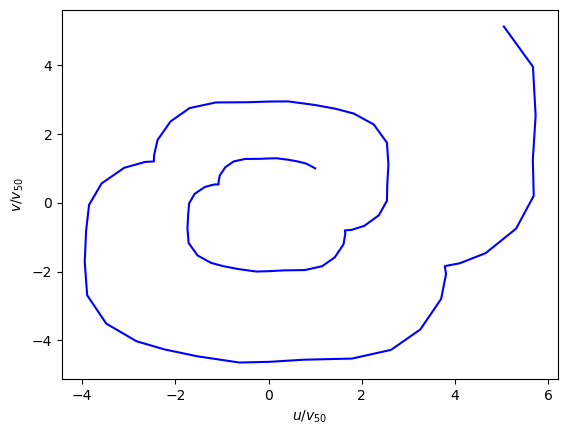

In [14]:
plt.plot(u_lagrange.values/u_lagrange.values[0],v_lagrange.values/v_lagrange.values[0],color="blue")
# plt.plot(u_lagrange.values/u_lagrange.values[0],b_lagrange.values/v_lagrange.values[0])
plt.xlabel("$u/v_{50}$")
plt.ylabel("$v/v_{50}$")

In [15]:
# w_lagrange = flow_fields.w.interp_like(flow_fields.v).sel(xC=flow_fields.xC[xi]-z_change(flow_fields.time[ti:tf],flow_fields.zC[zi],flow_fields.xC[xi]),zF=flow_fields.zC[zi],time=flow_fields.time[ti:tf],method="nearest")
# w_lagrange = w_lagrange.drop_vars(['xC','yC','zC'])
# u_lagrange = u_lagrange.drop_vars(['xF','yC','zC'])
# uw = u_lagrange*w_lagrange
# vw = v_lagrange*w_lagrange
# bw = np.cos(theta)*b_lagrange*w_lagrange
# bu = np.sin(theta)*b_lagrange*u_lagrange

In [16]:
# plt.plot(uw.time*fstar/(2*np.pi),uw,color="blue")
# plt.plot(vw.time*fstar/(2*np.pi),vw.isel(yF=0,yC=0)/(KE_turb_ip.isel(time=slice(ts2,tf2+1,10)).values*fstar),color="red")
# # plt.yscale("symlog",linthresh=1e-15)

In [17]:
# w_lagrange

In [18]:
# plt.plot(bw.time*fstar/(2*np.pi),bw,color="blue")
# plt.plot(bu.time*fstar/(2*np.pi),bu,color="red")
# plt.plot(bu.time*fstar/(2*np.pi),(bu+bw).isel(yC=0).values/(KE_turb_ip.isel(time=slice(ts2,tf2+1,10)).values*fstar),color="k")
# plt.yscale("symlog",linthresh=1e-17)

In [ ]:
# KE_turb_ip.values[ts2:tf2]